In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from pandas import DataFrame, Series

In [25]:
len(np.logspace(1.5,3).astype(int))

50

In [41]:
np.random.seed(99)
#so = Series(np.arange(4), index=['a','b','c','d']) 
so = Series(np.round(np.random.rand(8)*100), index=['a','b','c','d','e','f','g','h']) 
print(so)

a    67.0
b    49.0
c    83.0
d     3.0
e    81.0
f    57.0
g    30.0
h     5.0
dtype: float64


In [48]:
so[:-1:2]   # [start:end:step]

a    67.0
c    83.0
e    81.0
g    30.0
dtype: float64

**Transforming Data Frame**

In [11]:
s1 = so.transform(lambda x: x+1)
s2 = so.transform(lambda x: np.sqrt(x))
print(s1,'\n')
print(s2)


a    1.672279
b    1.488078
c    1.825495
d    1.031446
dtype: float64 

a    0.819926
b    0.698626
c    0.908568
d    0.177331
dtype: float64


In [12]:

Data_f = DataFrame(np.random.rand(42).reshape(7,6),columns=['a','b','c','d','e','f'])
print(Data_f)

          a         b         c         d         e         f
0  0.808050  0.565617  0.297622  0.046696  0.990627  0.006826
1  0.769793  0.746767  0.377439  0.494147  0.928948  0.395454
2  0.973956  0.524415  0.093613  0.813308  0.211687  0.554346
3  0.292269  0.816142  0.828043  0.221577  0.644835  0.095182
4  0.411663  0.096865  0.144011  0.212196  0.476656  0.077614
5  0.235044  0.006553  0.898644  0.552234  0.167547  0.928878
6  0.542088  0.041759  0.524877  0.640143  0.800658  0.834919


In [13]:
Data_f.cov()

,a,b,c,d,e,f
a,0.079114,0.038864,-0.067289,0.020359,0.024675,-0.014385
b,0.038864,0.118560,-0.008000,-0.022940,0.047461,-0.073413
c,-0.067289,-0.008000,0.099817,-0.004061,-0.011558,0.043050
d,0.020359,-0.022940,-0.004061,0.074636,-0.045093,0.083294
e,0.024675,0.047461,-0.011558,-0.045093,0.109337,-0.055107
f,-0.014385,-0.073413,0.043050,0.083294,-0.055107,0.140484


In [14]:
Data_f.corr()

,a,b,c,d,e,f
a,1.000000,0.401287,-0.757209,0.264948,0.265307,-0.136454
b,0.401287,1.000000,-0.073540,-0.243867,0.416857,-0.568842
c,-0.757209,-0.073540,1.000000,-0.047049,-0.110633,0.363545
d,0.264948,-0.243867,-0.047049,1.000000,-0.499169,0.813438
e,0.265307,0.416857,-0.110633,-0.499169,1.000000,-0.444639
f,-0.136454,-0.568842,0.363545,0.813438,-0.444639,1.000000


In [15]:
print(Data_f>0.2)

      a      b      c      d      e      f
0  True   True   True  False   True  False
1  True   True   True   True   True   True
2  True   True  False   True   True   True
3  True   True   True   True   True  False
4  True  False  False   True   True  False
5  True  False   True   True  False   True
6  True  False   True   True   True   True


In [16]:
# missing Value

missing = so.isnull()
missing

a    False
b    False
c    False
d    False
dtype: bool

In [17]:
Data_f.iloc[3:5,0]=missing
Data_f.iloc[1:4,5]=missing

In [18]:
Data_f

,a,b,c,d,e,f
0,0.80805,0.565617,0.297622,0.046696,0.990627,0.00682573
1,0.769793,0.746767,0.377439,0.494147,0.928948,NaN
2,0.973956,0.524415,0.093613,0.813308,0.211687,NaN
3,NaN,0.816142,0.828043,0.221577,0.644835,NaN
4,NaN,0.096865,0.144011,0.212196,0.476656,0.0776138
5,0.235044,0.006553,0.898644,0.552234,0.167547,0.928878
6,0.542088,0.041759,0.524877,0.640143,0.800658,0.834919


In [23]:
Data_f.isna().sum(axis=0)/len(Data_f)

a    0.285714
b    0.000000
c    0.000000
d    0.000000
e    0.000000
f    0.428571
dtype: float64

# fillna(0)

In [8]:
filled_df = Data_f.fillna(0)
filled_df

,a,b,c,d,e,f
0,0.808050,0.565617,0.297622,0.046696,0.990627,0.006826
1,0.769793,0.746767,0.377439,0.494147,0.928948,0.000000
2,0.973956,0.524415,0.093613,0.813308,0.211687,0.000000
3,0.000000,0.816142,0.828043,0.221577,0.644835,0.000000
4,0.000000,0.096865,0.144011,0.212196,0.476656,0.077614
5,0.235044,0.006553,0.898644,0.552234,0.167547,0.928878
6,0.542088,0.041759,0.524877,0.640143,0.800658,0.834919


# Counting missing values  isnull()

In [9]:
Data_f.isnull().sum()


a    2
b    0
c    0
d    0
e    0
f    3
dtype: int64

# Duplicate value  
df.drop_duplicated()   will drop all rows with duplicated values
df.drop_duplicated(['column-names'])  will drop the rows that have duplicate in only one column series.

# Droping from DF


In [10]:
Data_f1 =Data_f[:]  #making copy of Data Frame
Data_f2 = Data_f1.drop([0,2,3]) # drop first, third and fourth row
Data_f2

,a,b,c,d,e,f
1,0.769793,0.746767,0.377439,0.494147,0.928948,NaN
4,NaN,0.096865,0.144011,0.212196,0.476656,0.0776138
5,0.235044,0.006553,0.898644,0.552234,0.167547,0.928878
6,0.542088,0.041759,0.524877,0.640143,0.800658,0.834919


#### Data_f1.drop([2, 4],axis = 1) # now it will drop columns

# add rows to the one data frame and the second data frame 
obj_name1.append (obj_name2)

In [11]:
Data_f2.append(Data_f1, ignore_index =True)  # it will add rows to the one data frame and the second data frame

,a,b,c,d,e,f
0,0.769793,0.746767,0.377439,0.494147,0.928948,NaN
1,NaN,0.096865,0.144011,0.212196,0.476656,0.0776138
2,0.235044,0.006553,0.898644,0.552234,0.167547,0.928878
3,0.542088,0.041759,0.524877,0.640143,0.800658,0.834919
4,0.80805,0.565617,0.297622,0.046696,0.990627,0.00682573
5,0.769793,0.746767,0.377439,0.494147,0.928948,NaN
6,0.973956,0.524415,0.093613,0.813308,0.211687,NaN
7,NaN,0.816142,0.828043,0.221577,0.644835,NaN
8,NaN,0.096865,0.144011,0.212196,0.476656,0.0776138
9,0.235044,0.006553,0.898644,0.552234,0.167547,0.928878


In [41]:
df = pd.read_csv('cars.csv')

# Grouping
Notice that what is returned is not a set of DataFrames, but a DataFrameGroupBy object. This object is where the magic is: you can think of it as a special view of the DataFrame, which is poised to dig into the groups but does no actual computation until the aggregation (such as mean() or sum() )is applied.

 we can apply an aggregate to this DataFrameGroupBy object, which will perform the appropriate apply/combine steps to produce the desired result:

In [47]:
df['mpg'].value_counts()

10.4    2
21.4    2
30.4    2
15.2    2
19.2    2
22.8    2
21.0    2
33.9    1
14.7    1
21.5    1
15.5    1
16.4    1
17.8    1
26.0    1
15.8    1
18.1    1
15.0    1
18.7    1
27.3    1
13.3    1
24.4    1
14.3    1
17.3    1
19.7    1
Name: mpg, dtype: int64

In [43]:
car_mpg = df.groupby(df['mpg'])
print(car_mpg.sum().head())
print(car_mpg.mean().head())

      cyl   disp   hp  drat      wt   qsec  vs  am  gear  carb
mpg                                                           
10.4   16  932.0  420  5.93  10.674  35.80   0   0     6     8
13.3    8  350.0  245  3.73   3.840   0.00   0   0     3     4
14.3    8  360.0  245  3.21   3.570  15.84   0   0     3     4
14.7    8  440.0  230  3.23   5.345  17.42   0   0     3     4
15.0    8  301.0  335  3.54   3.570  14.60   0   1     5     8
      cyl   disp     hp   drat     wt   qsec   vs   am  gear  carb
mpg                                                               
10.4  8.0  466.0  210.0  2.965  5.337  17.90  0.0  0.0   3.0   4.0
13.3  8.0  350.0  245.0  3.730  3.840    NaN  0.0  0.0   3.0   4.0
14.3  8.0  360.0  245.0  3.210  3.570  15.84  0.0  0.0   3.0   4.0
14.7  8.0  440.0  230.0  3.230  5.345  17.42  0.0  0.0   3.0   4.0
15.0  8.0  301.0  335.0  3.540  3.570  14.60  0.0  1.0   5.0   8.0


Now by checking the data for group with mpg = 10.4(for example), we get two rows.


In [27]:
car_mpg.get_group(10.4)

,Unnamed: 0,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,8,460.0,215,3.00,5.424,17.82,0,0,3,4


In [48]:
car_mpg.get_group(30.4)

,Unnamed: 0,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
18,Honda Civic,4,75.7,52,4.93,1.615,18.52,1,1,4,2
27,Lotus Europa,4,95.1,113,3.77,1.513,16.90,1,1,5,2


**So we see the groupby() function just collect similar items into a group** 

In [15]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [16]:
df.iloc[0:5, 2]

0    6
1    6
2    4
3    6
4    8
Name: cyl, dtype: int64

In [17]:
df.isnull().sum()

Unnamed: 0    0
mpg           1
cyl           0
disp          0
hp            0
drat          1
wt            0
qsec          1
vs            0
am            0
gear          0
carb          0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df1 = df.drop([0,2])

In [20]:
df.shape

(32, 12)

(32, 12), means that the data frame has 32 dimensions, and each dimension has 12 elements.

In [21]:
df1.shape

(30, 12)

In [22]:
df.head(0)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


In [23]:
df1.head(1)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [24]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         31 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        31 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        31 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [32]:
df[['mpg','hp']].describe()

,mpg,hp
count,31.000000,32.000000
mean,19.693548,146.687500
std,5.685182,68.562868
min,10.400000,52.000000
25%,15.350000,96.500000
50%,19.200000,123.000000
75%,22.150000,180.000000
max,33.900000,335.000000


In [27]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,31.000000,32.000000,32.000000,32.000000,31.000000,32.000000,31.000000,32.000000,32.000000,32.000000,32.0000
mean,19.693548,6.187500,230.721875,146.687500,3.593226,3.217250,17.927419,0.437500,0.406250,3.687500,2.8125
std,5.685182,1.785922,123.938694,68.562868,0.543178,0.978457,1.759250,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.350000,4.000000,120.825000,96.500000,3.080000,2.581250,16.960000,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.690000,3.325000,17.820000,0.000000,0.000000,4.000000,2.0000
75%,22.150000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [55]:
df1 = df.groupby(df[ 'cyl'])
df1.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [63]:
mpgdf = df.mpg
#print(mpgdf)
mpgdf.value_counts()

10.4    2
21.4    2
30.4    2
15.2    2
19.2    2
22.8    2
21.0    2
33.9    1
14.7    1
21.5    1
15.5    1
16.4    1
17.8    1
26.0    1
15.8    1
18.1    1
15.0    1
18.7    1
27.3    1
13.3    1
24.4    1
14.3    1
17.3    1
19.7    1
Name: mpg, dtype: int64

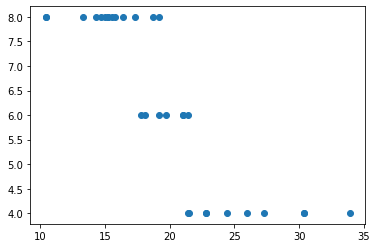

In [28]:
plt.scatter(df.mpg, df.cyl)
plt.show()

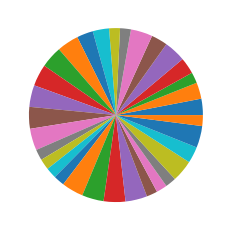

In [29]:
plt.pie(df.cyl)
plt.show()

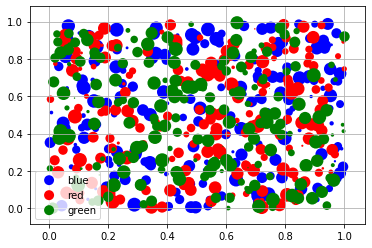

In [30]:
np.random.seed(19680801)


fig, ax = plt.subplots()
for color in ['blue', 'red', 'green']:
    n = 200
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=1, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

# Generating matrix and Matrix Multiplication

In [ ]:
import numpy as np 
import random

A =np.ones((3,2))
B =np.full((2,3),-2)

C =np.full((2,5),random.randrange(1, 45))

print(A)
print(B)


np.matmul(A,B)

print(C)


In [46]:
import random

from pandas import  DataFrame
L =DataFrame(np.random.randint(10,size = 48).reshape(6,8))
print(L)

   0  1  2  3  4  5  6  7
0  2  5  0  1  7  0  5  3
1  5  9  8  3  1  5  0  0
2  7  7  0  7  7  4  0  9
3  9  8  2  0  9  1  8  8
4  7  7  5  2  2  3  0  6
5  2  2  5  1  5  6  5  4
